In [138]:
suppressPackageStartupMessages(if(!require(itsmr)) install.packages("itsmr", repos = "http://cran.us.r-project.org"))
suppressPackageStartupMessages(if(!require(astsa)) install.packages("astsa", repos = "http://cran.us.r-project.org"))
suppressPackageStartupMessages(if(!require(TSA)) install.packages("TSA", repos = "http://cran.us.r-project.org"))
suppressPackageStartupMessages(if(!require(forecast)) install.packages("forecast", repos = "http://cran.us.r-project.org"))
suppressPackageStartupMessages(if(!require(lmtest)) install.packages("lmtest", repos = "http://cran.us.r-project.org"))
suppressPackageStartupMessages(if(!require(tsoutliers)) install.packages("tsoutliers", repos = "http://cran.us.r-project.org"))
suppressPackageStartupMessages(if(!require(car)) install.packages("car", repos = "http://cran.us.r-project.org"))

In [90]:
# Aumentar o tamanho das figuras
#options(repr.plot.width=16, repr.plot.height=12)
options(repr.plot.width=8, repr.plot.height=6)

In [93]:
n<-1000
x<-arima.sim(n=n,list(order=c(1,0,0),ar=0.5))

In [ ]:
itsmr::plotc(x)

In [95]:
fit.x<-arima(x, order=c(1, 0, 0), include.mean = FALSE)
coeftest(fit.x)


z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ar1 0.474862   0.027819   17.07 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


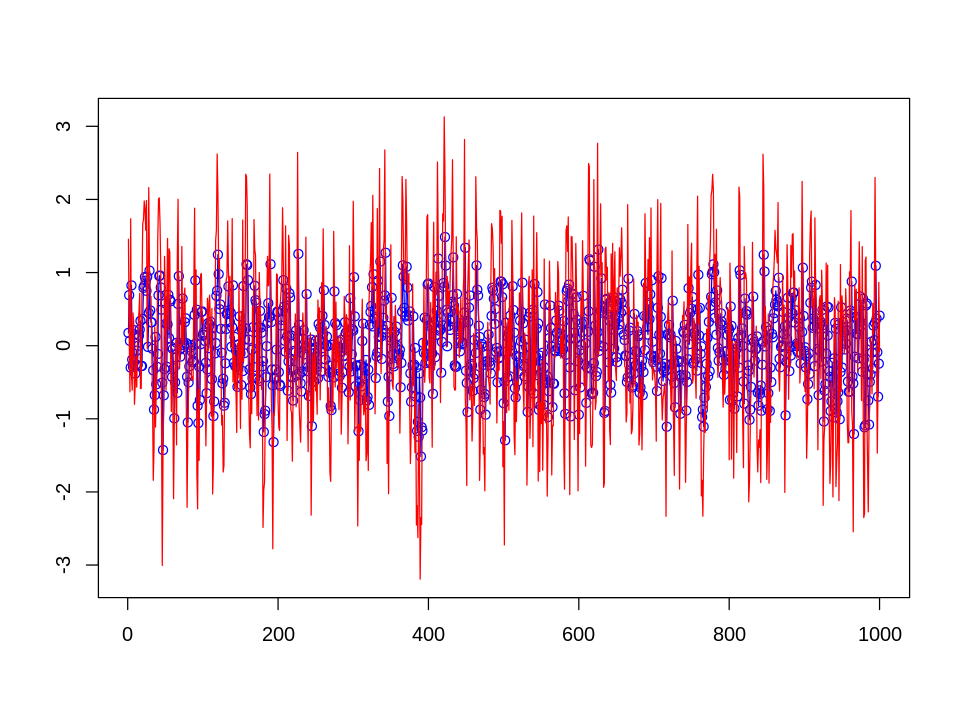

In [97]:
itsmr::plotc(fitted(fit.x),x)

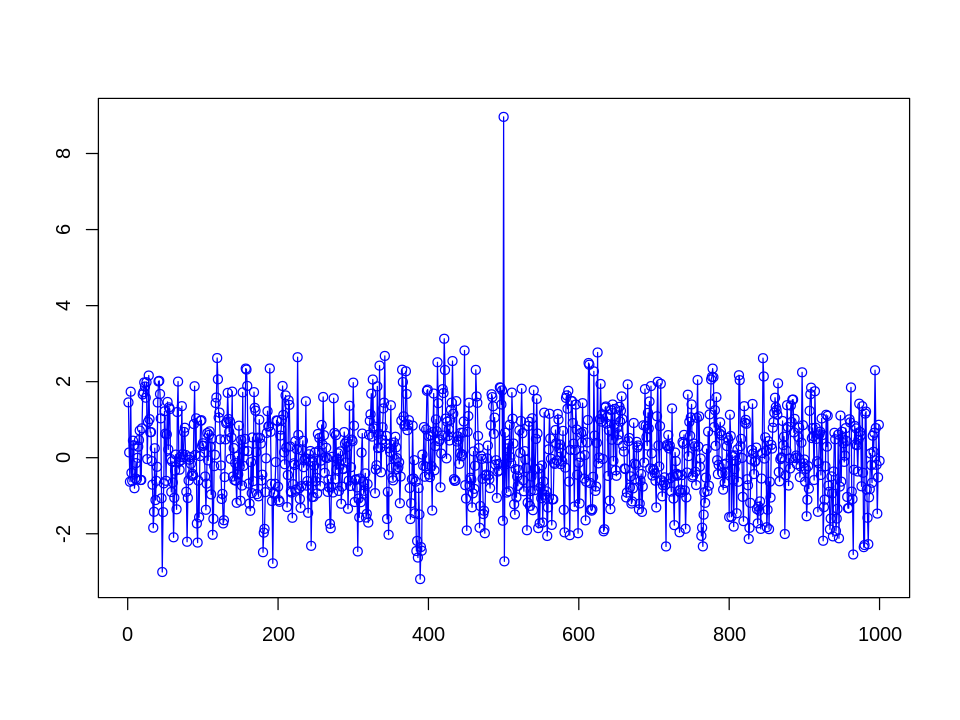

In [98]:
y<-x
y[n*0.5]<-y[n*0.5]+10
itsmr::plotc(y)

In [116]:
forecast::tsoutliers(y)

$index
[1] 500

$replacements
[1] -2.190714

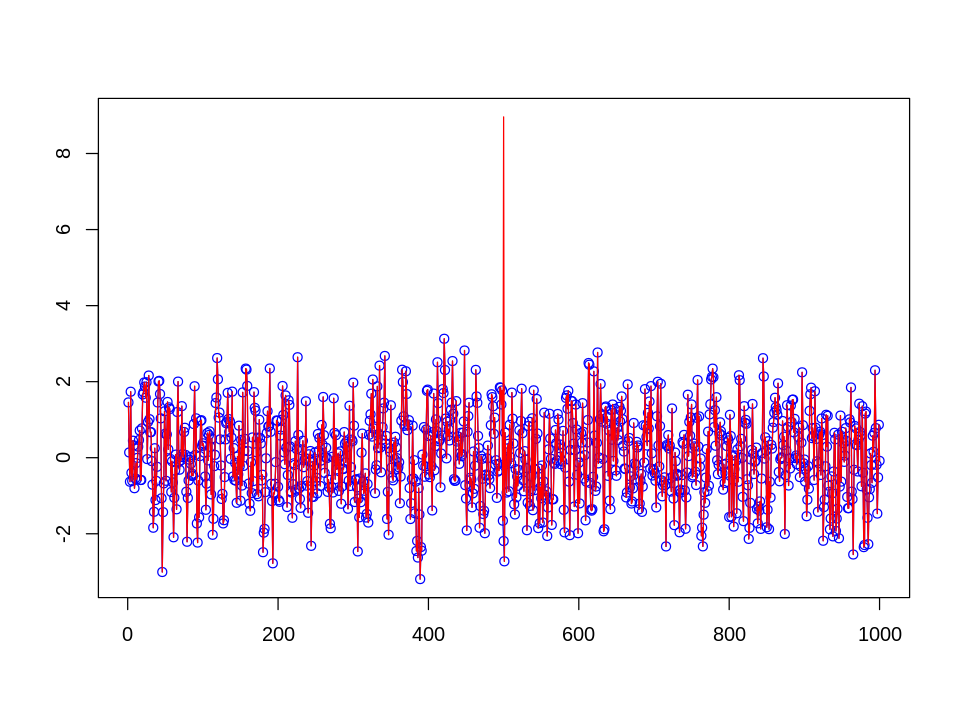

In [118]:
plotc(forecast::tsclean(y),y)

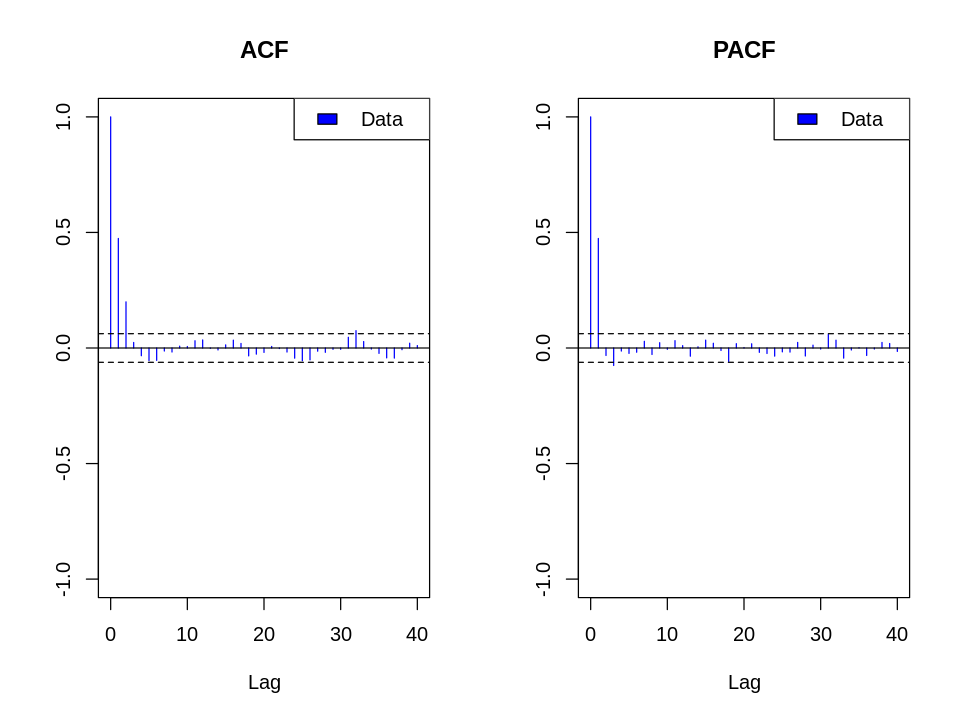

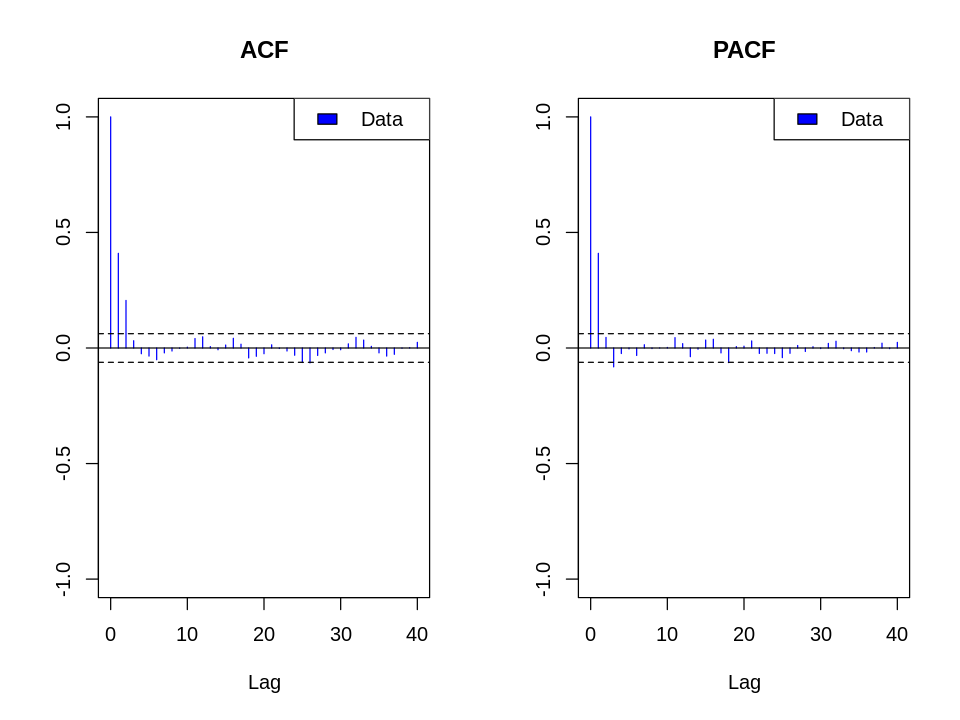

In [99]:
itsmr::plota(x); itsmr::plota(y)

In [100]:
fit.y<-arima(y, order=c(1, 0, 0), include.mean = FALSE)
coeftest(fit.y)


z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ar1 0.410793   0.028822  14.252 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


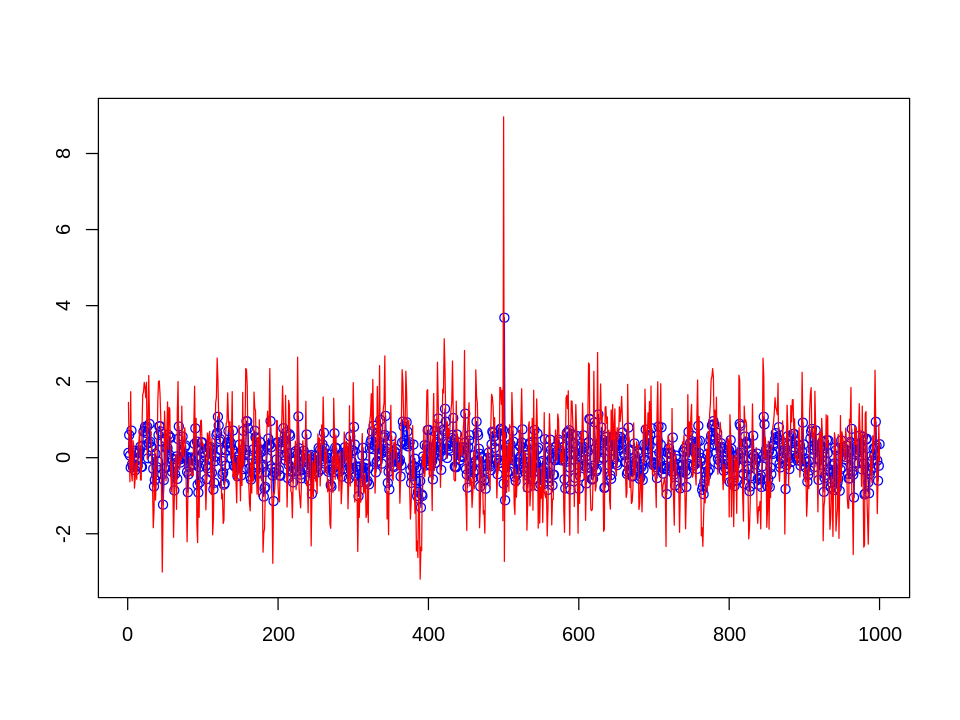

In [101]:
itsmr::plotc(fitted(fit.y),y)

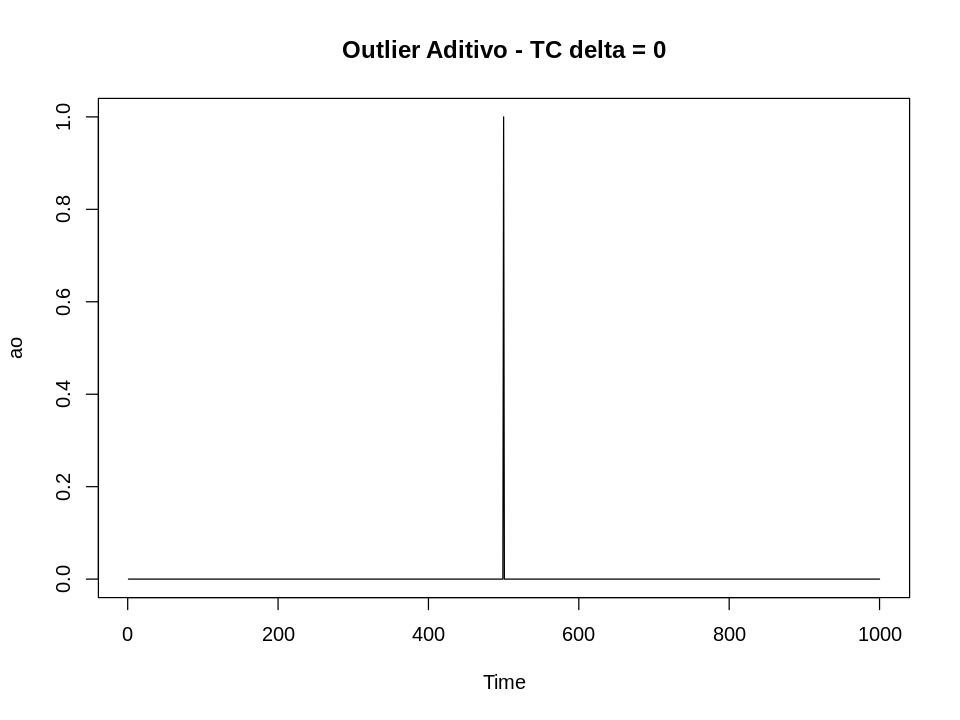

In [102]:
tc <- rep(0, n)
tc[n*0.5] <- 1
ao <- filter(tc, filter = 0, method = "recursive")
plot(ao, main = "Outlier Aditivo - TC delta = 0", type = "l")

In [103]:
fit.interv<-arima(y, order=c(1, 0, 0), xreg=tc, include.mean = FALSE)
coeftest(fit.interv)


z test of coefficients:

     Estimate Std. Error z value  Pr(>|z|)    
ar1  0.476575   0.027862  17.105 < 2.2e-16 ***
tc  10.663984   0.869892  12.259 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


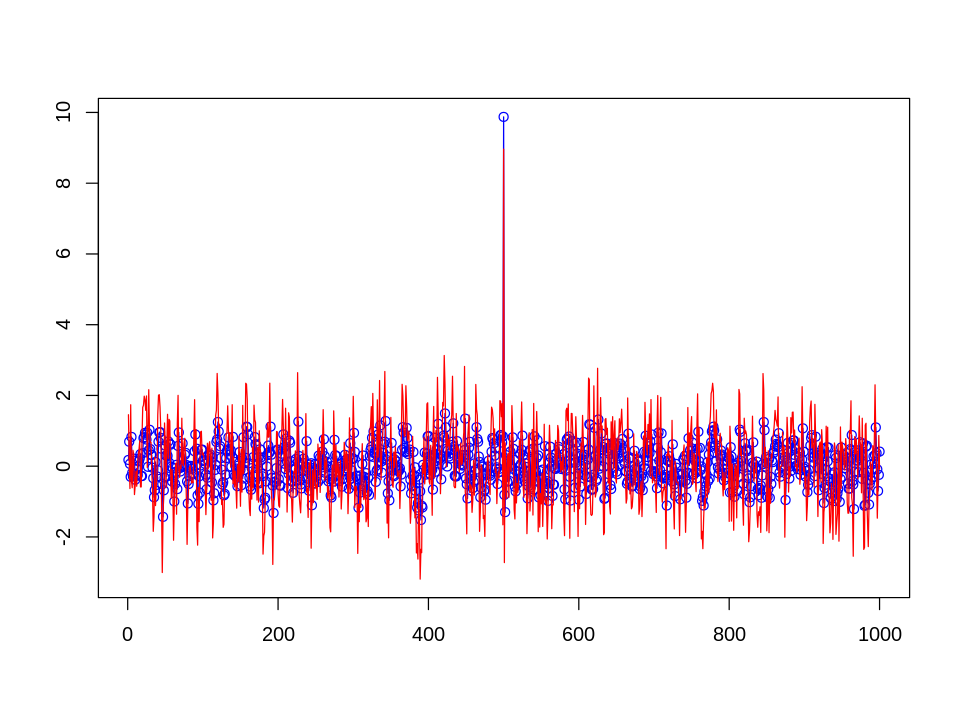

In [104]:
itsmr::plotc(y-fit.interv$residuals,y)

In [214]:
ao_effect <- fit.interv$coef[2]*tc

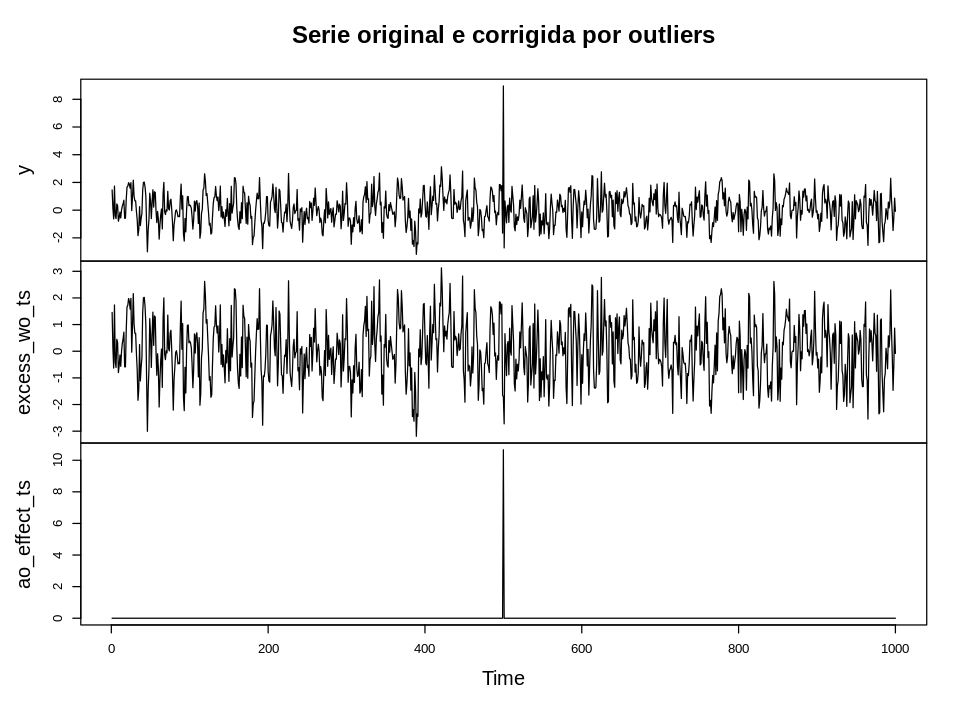

In [217]:
ao_effect_ts <- ts(ao_effect)

# Substraindo o efeito da intervenção
excess_wo_ts <- y - ao_effect_ts

plot(cbind(y, excess_wo_ts, ao_effect_ts), main="Serie original e corrigida por outliers")

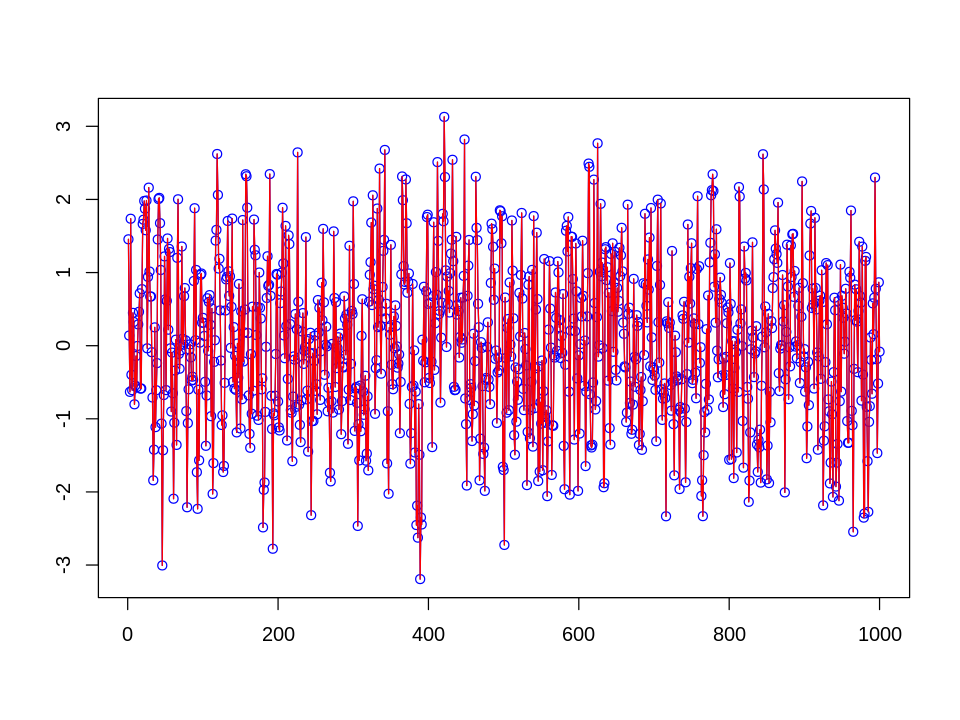

In [218]:
plotc(excess_wo_ts,x)

## Usando o pacote tsoutliers

In [169]:
outliers_excess_ts <- tso(y, types = c("TC", "AO", "LS", "IO", "SLS"))
outliers_excess_ts

Series: y 
Regression with ARIMA(1,0,0) errors 

Coefficients:
         ar1    AO500
      0.4766  10.6640
s.e.  0.0279   0.8699

sigma^2 = 0.9256:  log likelihood = -1379.41
AIC=2764.83   AICc=2764.85   BIC=2779.55

Outliers:
  type ind time coefhat tstat
1   AO 500  500   10.66 12.26

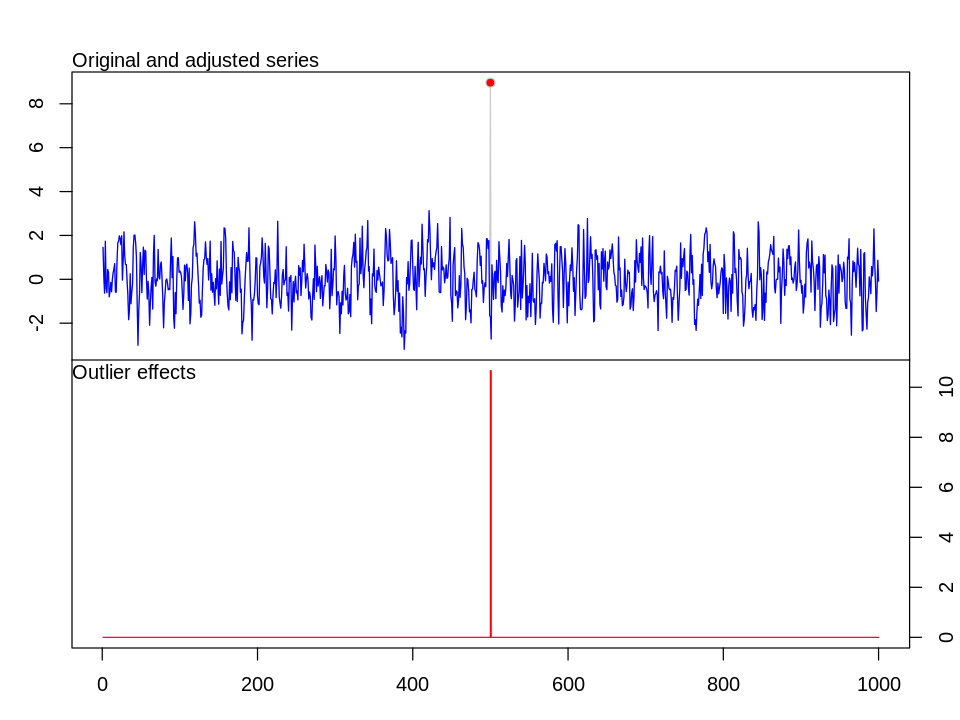

In [170]:
plot(outliers_excess_ts)

In [171]:
outliers_excess_ts$outliers

type,ind,time,coefhat,tstat
<fct>,<int>,<dbl>,<dbl>,<dbl>
AO,500,500,10.66398,12.25897


In [172]:
(outliers_idx <- outliers_excess_ts$outliers$ind)

[1] 500

In [178]:
mo_tc <- outliers("AO", outliers_idx); mo_tc

type,ind,coefhat
<fct>,<int>,<dbl>
AO,500,1


In [180]:
tc <- outliers.effects(mo_tc, n)

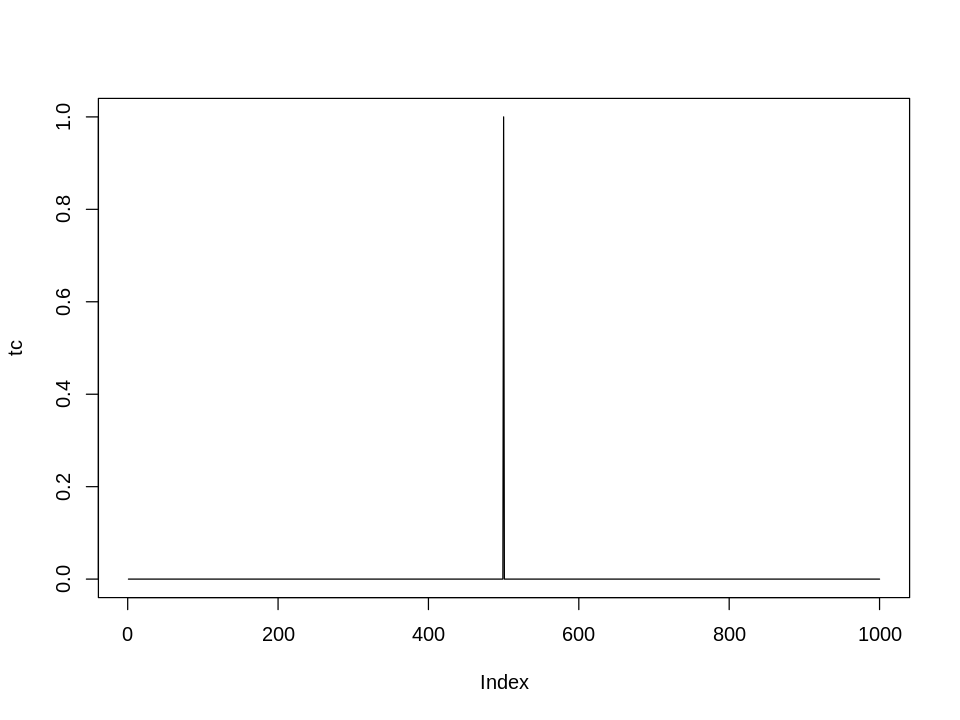

In [181]:
plot(tc,type='l')

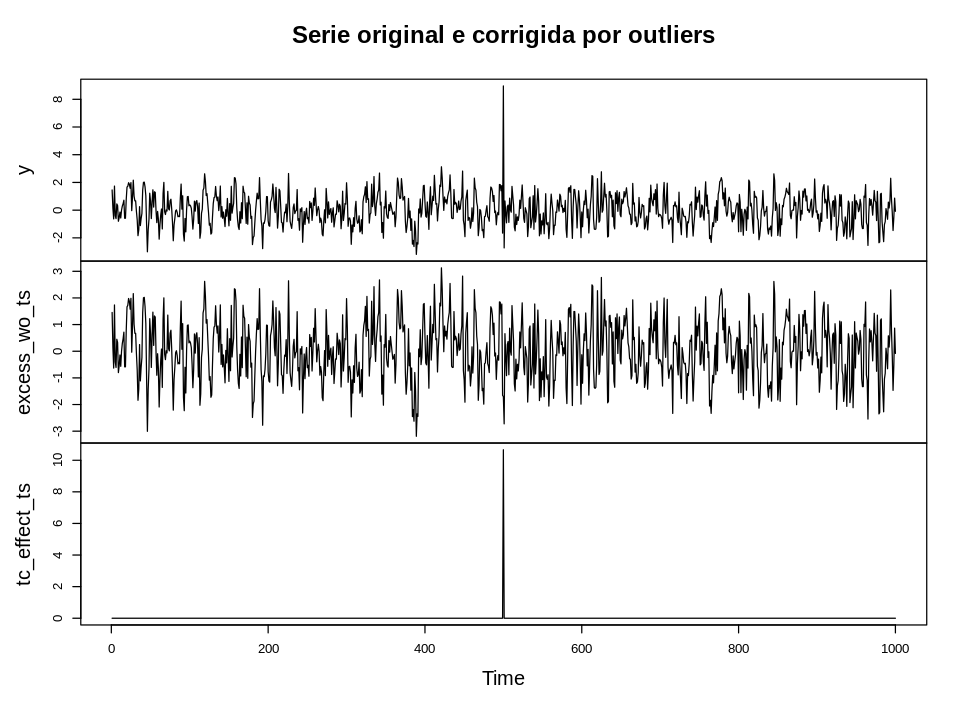

In [211]:
omega_hat <- as.numeric(outliers_excess_ts$outliers["coefhat"])

# Calculando vetor que representa o efeito da intervenção
ao_effect <- omega_hat*tc

ao_effect_ts <- ts(ao_effect)

# Substraindo o efeito da intervenção
excess_wo_ts <- y - ao_effect_ts

plot(cbind(y, excess_wo_ts, ao_effect_ts), main="Serie original e corrigida por outliers")

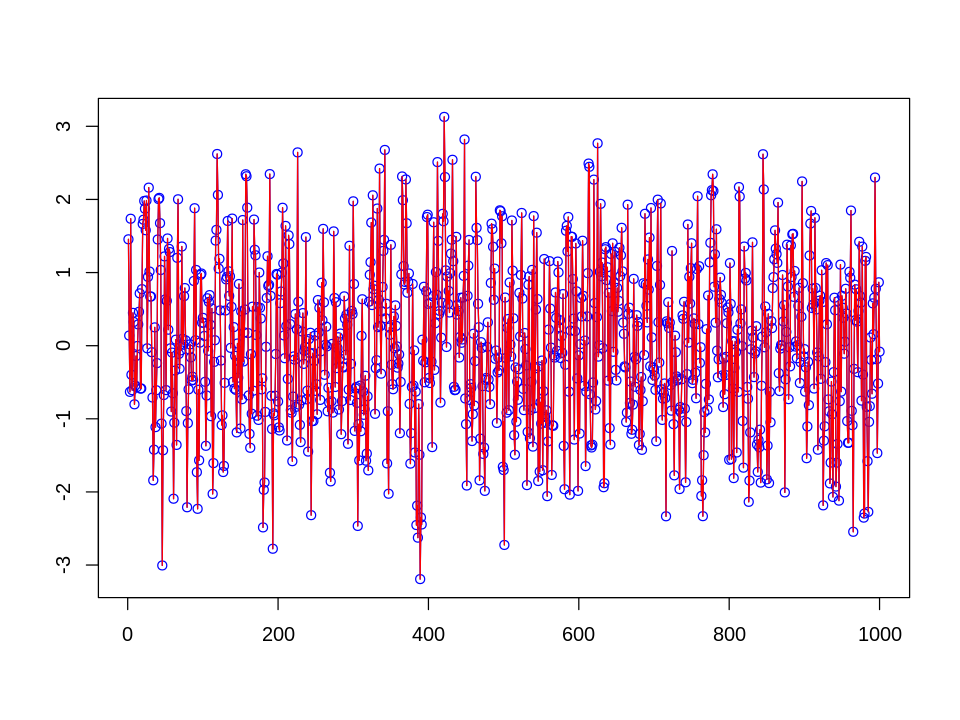

In [206]:
plotc(excess_wo_ts,x)

### Mudança transitória

\begin{equation} 
\begin{aligned} 
f_t(T) = \dfrac{\omega B}{1 – \delta B} \mathbb{I}_{t}(T) 
\end{aligned} 
\end{equation}

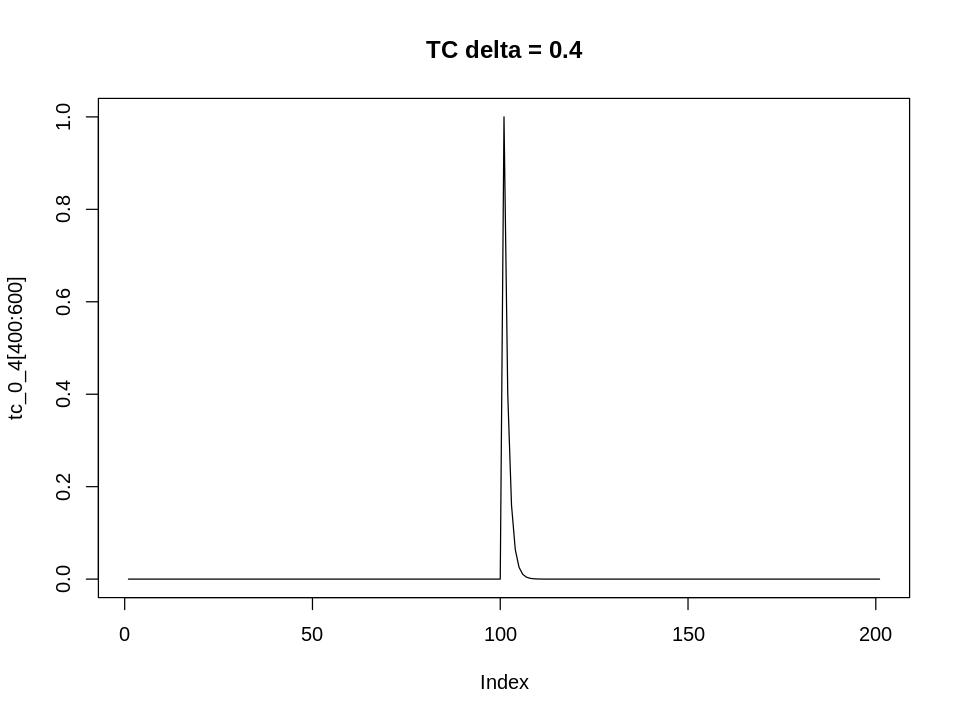

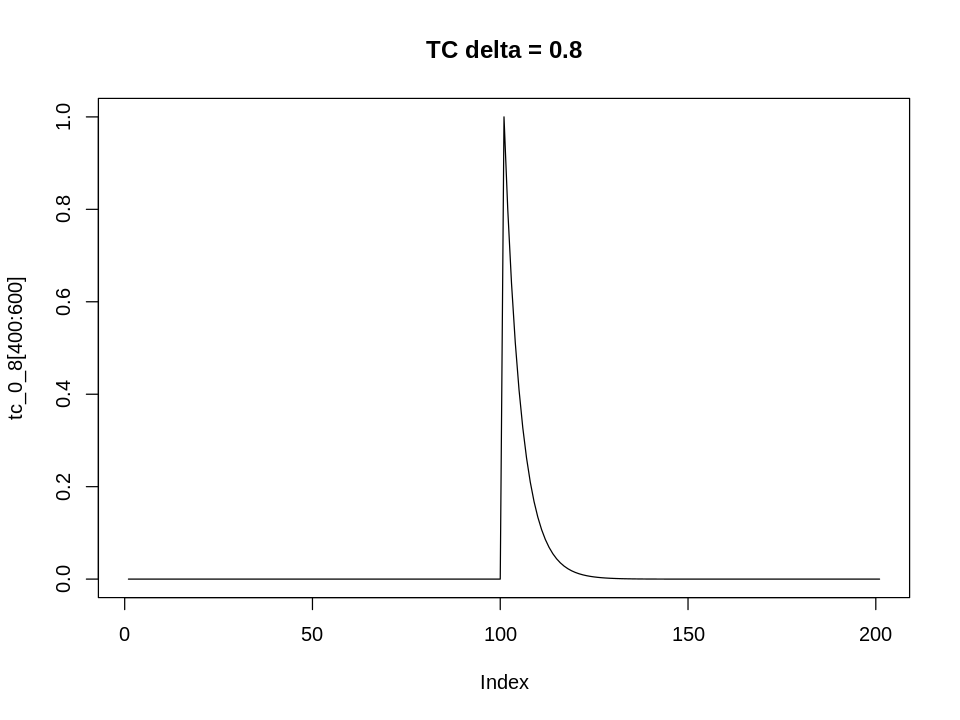

In [114]:
tc_0_4 <- filter(tc, filter = 0.4, method = "recursive")
tc_0_8 <- filter(tc, filter = 0.8, method = "recursive")
plot(tc_0_4[400:600], main = "TC delta = 0.4", type = "l") # Intervalo [400,600]
plot(tc_0_8[400:600], main = "TC delta = 0.8", type = "l")

### Mudança permanente

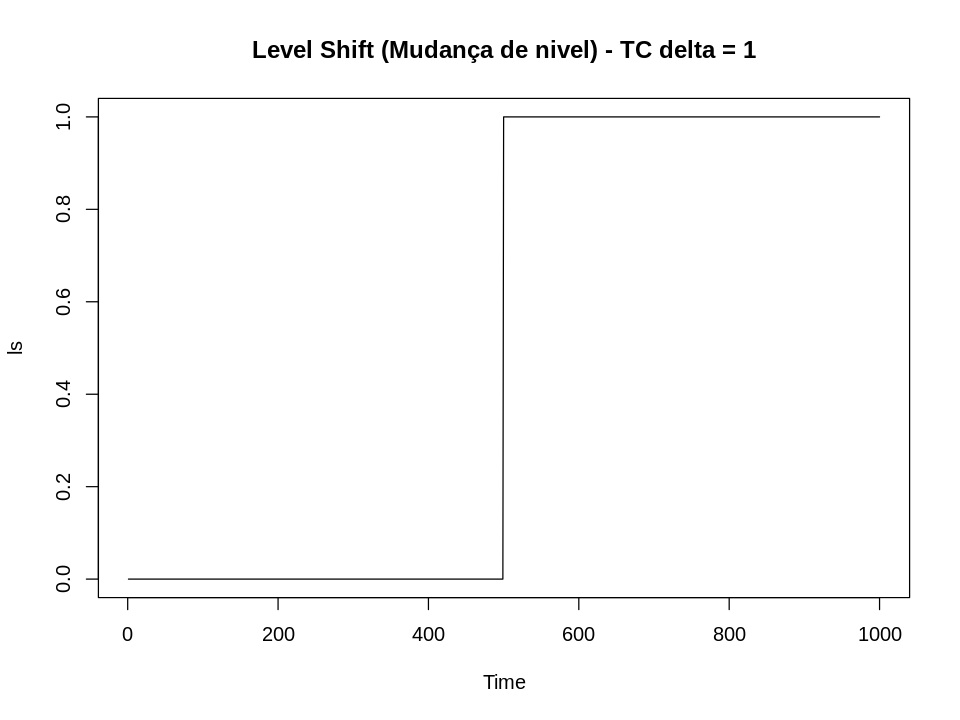

In [119]:
tc <- rep(0, n)
tc[n*0.5] <- 1
ls <- filter(tc, filter = 1, method = "recursive")
plot(ls, main = "Level Shift (Mudança de nivel) - TC delta = 1", type = "l")

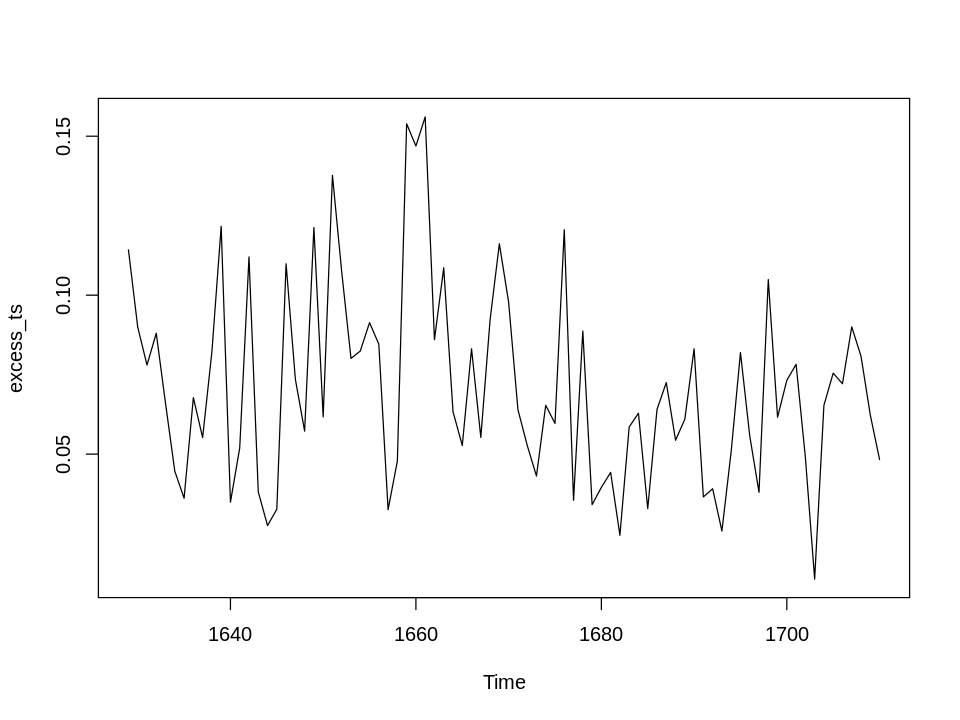

In [221]:
url <- "https://bit.ly/3l3MHlm"
abhutondot <- read.csv(url, header=TRUE)

boys_ts <- ts(abhutondot$boys, frequency=1, start = abhutondot$year[1])
girls_ts <- ts(abhutondot$girls, frequency=1, start = abhutondot$year[1])

delta_ts <- boys_ts - girls_ts
excess_ts <- delta_ts/girls_ts
plot(excess_ts)

In [222]:
outliers_excess_ts <- tso(excess_ts, types = c("TC", "AO", "LS", "IO", "SLS"))
outliers_excess_ts

Series: excess_ts 
Regression with ARIMA(0,0,0) errors 

Coefficients:
      intercept    TC31
         0.0665  0.1049
s.e.     0.0031  0.0199

sigma^2 = 0.0007378:  log likelihood = 180.34
AIC=-354.69   AICc=-354.38   BIC=-347.47

Outliers:
  type ind time coefhat tstat
1   TC  31 1659  0.1049 5.283

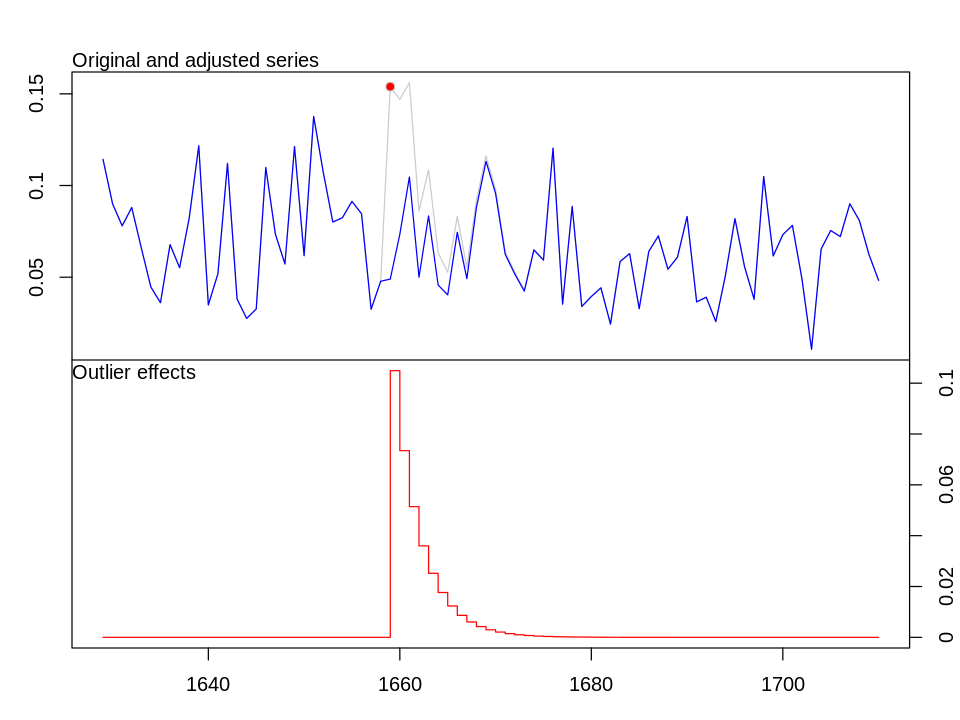

In [140]:
plot(outliers_excess_ts)

In [223]:
outliers_excess_ts$outliers

type,ind,time,coefhat,tstat
<fct>,<int>,<dbl>,<dbl>,<dbl>
TC,31,1659,0.1049228,5.28339


In [224]:
# Indice ou posição do valor atípico
(outliers_idx <- outliers_excess_ts$outliers$ind)

[1] 31

In [225]:
# Tempo em que foi observado o valor atípico
outliers_excess_ts$outliers$time

[1] 1659

In [226]:
# Tamanho de amostra
n <- length(excess_ts)

In [233]:
mo_tc <- outliers("TC", outliers_idx); mo_tc

type,ind,coefhat
<fct>,<int>,<dbl>
TC,31,1


In [234]:
tc <- outliers.effects(mo_tc, n)

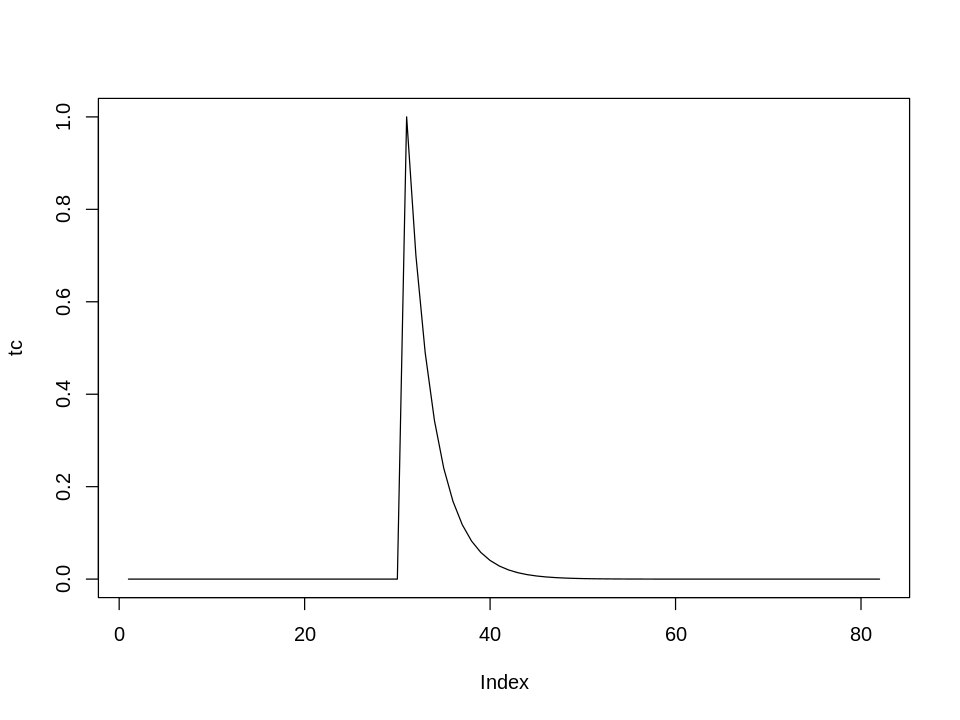

In [235]:
plot(tc,type='l')

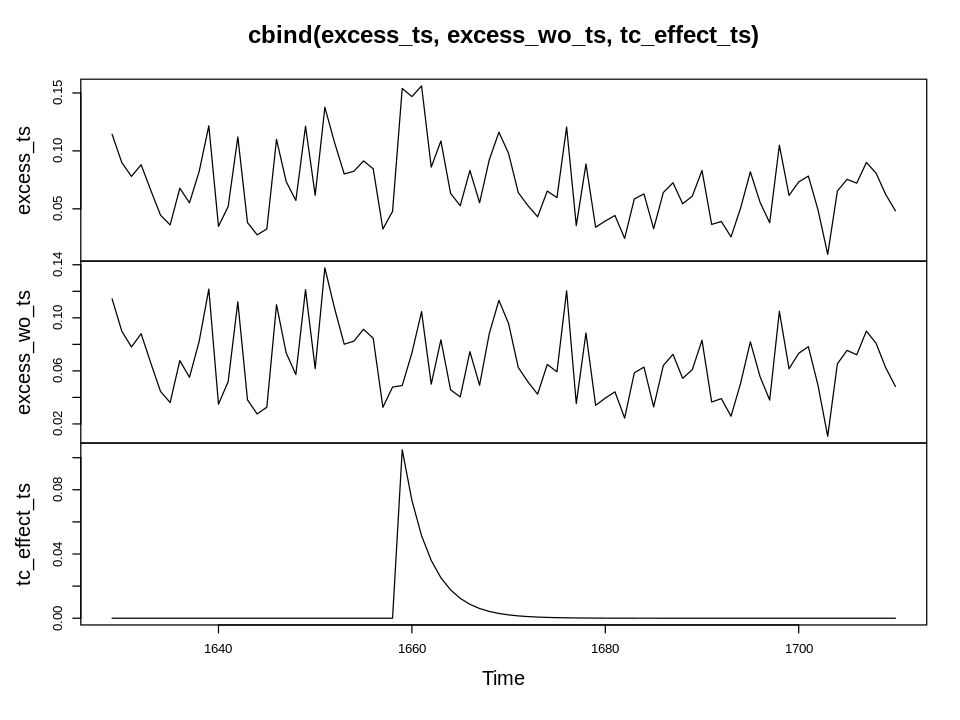

In [236]:
omega_hat <- as.numeric(outliers_excess_ts$outliers["coefhat"])

tc_effect <- omega_hat*tc

tc_effect_ts <- ts(tc_effect, frequency = frequency(excess_ts), start = start(excess_ts))

excess_wo_ts <- excess_ts - tc_effect_ts

plot(cbind(excess_ts, excess_wo_ts, tc_effect_ts))

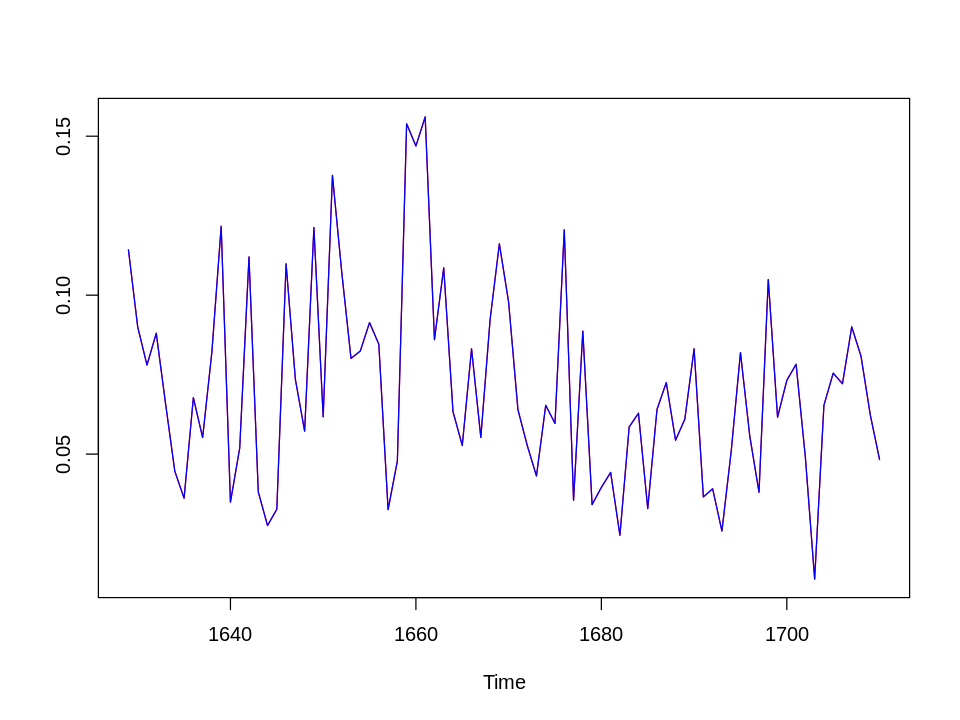

In [241]:
ts.plot(cbind(tc_effect_ts+excess_wo_ts,excess_ts),col=c('red','blue'))